# gene1: Mirlet7g 

annotation data 에서 Mirlet7g 위치 찾기

In [1]:
!grep -i mirlet7g ../datapack/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


CLIP-seq결과에서 Mirlet7g 위치로 추출하기

In [2]:
!samtools view -b -o CLIP-let7g.bam ../datapack/CLIP-35L33G.bam chr9:106056039-106056126
!samtools view CLIP-let7g.bam | wc -l

     163


_근데, 이렇게 chr위치를 지정해서 뽑은 결과가 왜 그 위치 바깥에 잇는 read까지 불러냈는지 잘 모르겠다._

In [3]:
!samtools view CLIP-let7g.bam | head -3

SRR458758.222778	16	chr9	106007092	38	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	<AE?E=??8BB?DGBGG=4<?:477>=	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:38	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-
SRR458758.2480600	16	chr9	106007092	40	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	IFHHHHHIIHHIIIHIIIHIEGIIGI?	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:40	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-
SRR458758.3458120	16	chr9	106007092	39	8M2D2M68520N16M1S	*	0	0	AGCAATAGCCCAAATCAGGGCTCATTT	FGHDHGHEBCEEEBHGHFGFEGDGGGB	MD:Z:8^AA2T15	NH:i:1	HI:i:1	NM:i:3	SM:i:39	XQ:i:40	X2:i:0	XO:Z:UU	XS:A:-


_내가 파악해본 바에 의하면 파일업은 그 싱글 레퍼런스포지션별로 그 베이스의 파일업, 리드커버리지를 정리해서 보여주는 파일인거 같음_  
_The SAMtools mpileup utility provides a summary of the coverage of mapped reads on a reference sequence at a single base pair resolution._

In [4]:
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
   68548 CLIP-let7g.pileup


pileup format은 다음과같다고 한다.
* 1st column: Chromosome name
* 2nd column: 1-based position on the chromosoem
* 3rd column: Ref. base at this position (우리는 pileup할 때 -f 옵션을 안주었으므로 이건 다 N나옴)
* 4th column: number of reads covering this position
* 5th column: basereads
* 6th column: quality

_그럼 이 파일업 파일의 헤드랑 테일을 봤을 때 사실은 106,056,039 부터 106,056,126 위치의 결과가 나와야하는데 보니까 엄청 길게 나옴. 즉 68,548 bp의 파일업결과가 잇는거임 (106,075,639-106,007,092 +1)_  
_이 문제가 위에서 나왔던 samtool에서 chr:위치 로 추출할 때 그 바깥까지 같이 찾은거랑 같은 맥락의 문제인 듯_

In [5]:
!head -3 CLIP-let7g.pileup ;tail -3 CLIP-let7g.pileup

chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGHII
chr9	106007093	N	9	ggggggggg	AFGIEGDII
chr9	106007094	N	9	ccccccccc	EHHIGAFEH
chr9	106075637	N	9	aaaaaaaaa	7IGIGBCGI
chr9	106075638	N	9	ttttttttt	7GGIGDEGI
chr9	106075639	N	9	t$t$t$t$t$t$t$t$t$	>IGFDDDGH


위에서 봤던거처럼 Mirlet7g의 위치인 106056039와 106056126 에 맵핑되는 결과들만 가져오기

In [6]:
!awk '$2 >= 106056039 && $2 <= 106056126 {print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!wc -l CLIP-let7g-gene.pileup

      88 CLIP-let7g-gene.pileup


In [7]:
!tail CLIP-let7g-gene.pileup

chr9	106056117	N	138	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	N	139	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII3AHIIIDGGGIIB3EHFBH>GIIIIIIIIIHIIHHAIIGBDGHIDH?GIIGIIHHDIIHIGIGGI=BGG9GIHHHIIGI=IAIIGGIEHGIEBG@DHDE;IBDGG4IGGIGGIIIIGGGDGIH1G
chr9	106056119	N	138	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTTTTTTTTTTTTTT$TTTT$TTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	BHEIG?DIIGEFII:/GIIEDDHDIIF>BH3<HBEGIHIGFIIIBIIBE:HHGD>EGGDH7BIIGGIHHDHIHDEIGEIDHGG;GIHGHHIGD:IGHD:GGEHH?3G87HD</I=DGG=IHHIHBIFII@<HDHHH1G
chr9	106056120	N	133	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTT$TTTTTTTTTT$TTTTTTTT$TTTTTTTT

In [8]:
import pandas as pd
pileup_7g = pd.read_csv("CLIP-let7g-gene.pileup",
                        sep ='\t', names = ["chrom", "pos", "_ref", "count", "basereads", "quals"])
pileup_7g.tail()

,chrom,pos,_ref,count,basereads,quals
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD
87,chr9,106056126,N,30,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIGHGHIGHI>G;GGGIGIHG


In [9]:
import re
toremove = re.compile('[<>*#^$]')
pileup_7g["matches"] = pileup_7g["basereads"].apply(lambda x: toremove.sub("", x))

In [43]:
pileup_7g[["chrom", "pos", "matches"]]

,chrom,pos,matches
0,chr9,106056039,
1,chr9,106056040,
2,chr9,106056041,
3,chr9,106056042,
4,chr9,106056043,
...,...,...,...
83,chr9,106056122,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84,chr9,106056123,CCCCCCCCCCCCCCCCCCCCCC
85,chr9,106056124,AAAAAAAAAAAAAAAAAAAAAA
86,chr9,106056125,GGGGGGGGGGGGGGGGGGGGGG


_그러면 이제 예시로 Mirlet7g gene에서 106056094위치의 matched or substituted coverage를 확인해보자_

In [16]:
pileup_7g[pileup_7g["pos"] == 106056095].iloc[0]["matches"]

'GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA'

read data에서 nucleotide가 A,T,G,C 외에 혹시 다른 string이 있는지 확인해본다

In [60]:
nucleotidecheck= ""
for mat in pileup_7g["matches"]:
    nucleotidecheck += mat
set(nucleotidecheck)

{'A', 'B', 'C', 'D', 'G', 'H', 'I', 'T'}

seq정보에서 샤논엔트로피를 구하는 함수에 대한 코드 작성

In [88]:
def shannon_cal(seq):
    if len(seq) == 0:
        H = 0
    else:
        #count of A,C,G,and T
        c_A = seq.count("A") + \
             (seq.count("M") + seq.count("R") + seq.count("W"))/2 + \
             (seq.count("V") + seq.count("H") + seq.count("D"))/3 + \
             (seq.count("N"))/4
        c_C = seq.count("C") + \
             (seq.count("M") + seq.count("S") + seq.count("Y"))/2 + \
             (seq.count("V") + seq.count("H") + seq.count("B"))/3 + \
             (seq.count("N"))/4
        c_G = seq.count("G") + \
             (seq.count("R") + seq.count("S") + seq.count("K"))/2 + \
             (seq.count("V") + seq.count("D") + seq.count("B"))/3 + \
             (seq.count("N"))/4  
        c_T = seq.count("T") + \
             (seq.count("W") + seq.count("Y") + seq.count("K"))/2 + \
             (seq.count("H") + seq.count("D") + seq.count("B"))/3 + \
             (seq.count("N"))/4
        #probability of A,C,G and T
        pr = [c_A/len(seq), c_C/len(seq), c_G/len(seq), c_T/len(seq)]
        #shannon entropy H
        H = 0
        for pi in pr:
            if pi == 0:
                H += 0
            else:
                H += -pi*np.log2(pi)
        
    return H          

pileup_7g 데이터에 필요한 열들을 추가한다

In [89]:
pileup_7g["posplus"] = pileup_7g["pos"]+1
pileup_7g["shannon"] = pileup_7g["matches"].apply(lambda x: shannon_cal(x))
pileup_7g.tail()

,chrom,pos,_ref,count,basereads,quals,matches,shannon,posplus
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.0,106056123
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH,CCCCCCCCCCCCCCCCCCCCCC,0.0,106056124
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH,AAAAAAAAAAAAAAAAAAAAAA,0.0,106056125
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD,GGGGGGGGGGGGGGGGGGGGGG,0.0,106056126
87,chr9,106056126,N,30,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIGHGHIGHI>G;GGGIGIHG,GGGGGGGGGGGGGGGGGGGGG,0.0,106056127


bedgraph데이터 export

In [91]:
bedgraph_7g = pileup_7g[["chrom", "pos", "posplus", "shannon"]]
bedgraph_7g.to_csv("bedgraph_7g.txt", index=False, header=None, sep="\t")

In [97]:
with open('bedgraph_7g.txt', 'r') as original: data = original.read()
with open('bedgraph_7g.txt', 'w') as modified: 
    modified.write('track type=bedGraph name="BedGraph Format" description="BedGraph format"\n' + data)

UCSC Genome Browser에서 custom track을 추가하고 genom browser 이미지를 캡쳐하여 저장한다

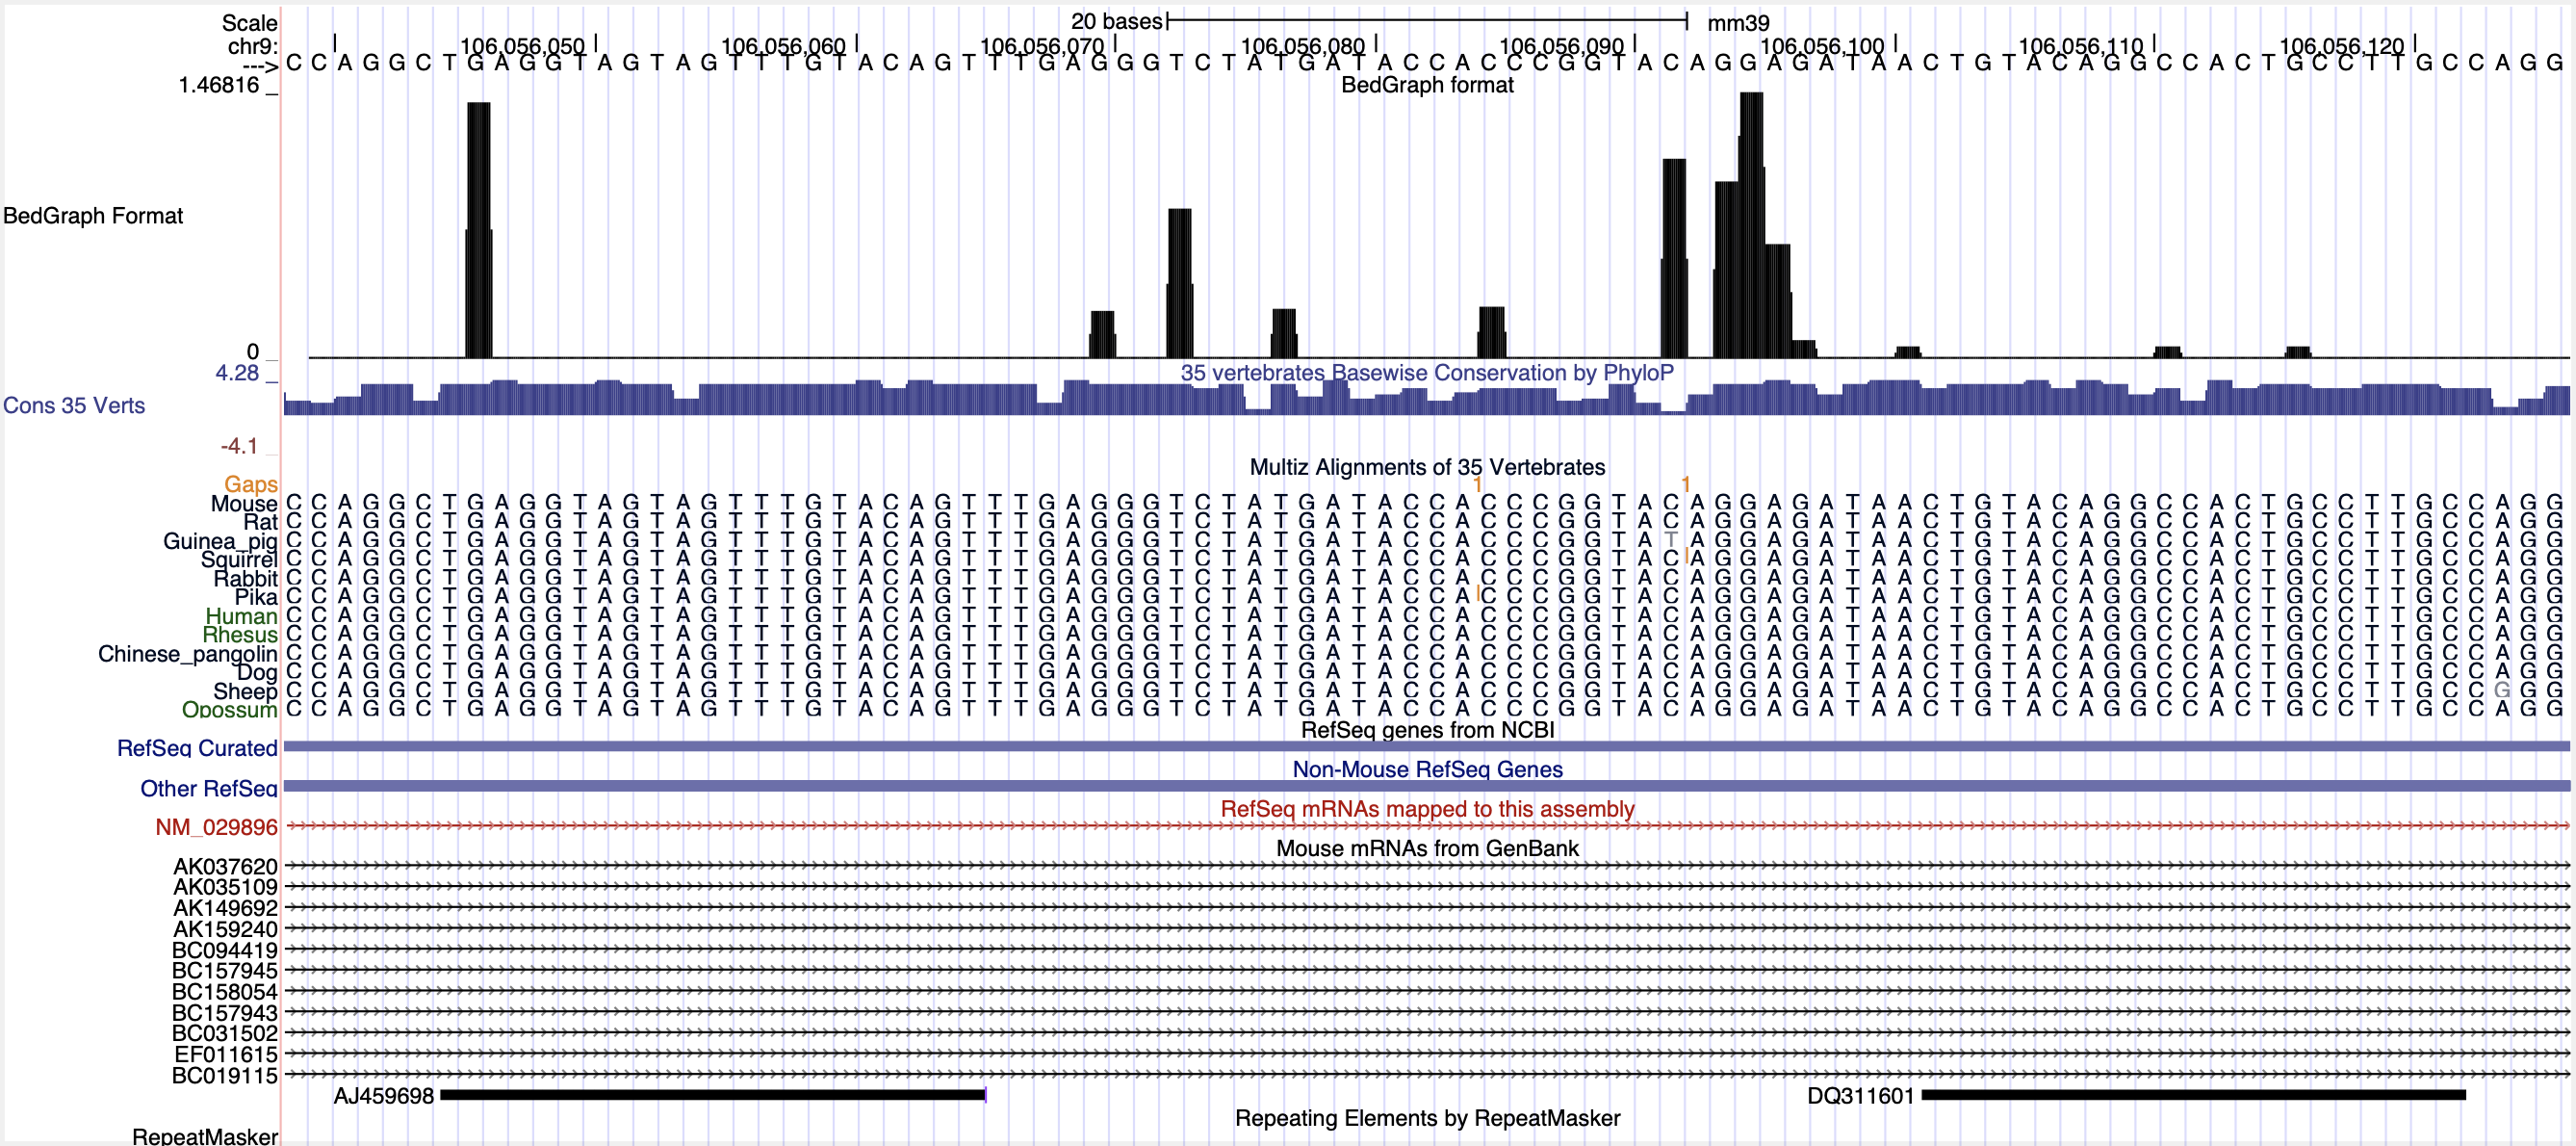

In [101]:
from IPython.display import Image
Image("res_img/mirlet7g_ucsc.png")

mirlet7g 유전자를 통하여 한번 연습해봤으니 다음과 같은 4개의 step으로 mirlet7d와 mirlet7f-1 유전자도 동일하게 분석한다.
1. reference에서 유전자 위치 확인
2. pileup생성하기
3. shannon entropy계산 및 BedGraph output생성 (w/ Pandas)
4. UCSC Genome Browser 결과 확인

# gene2: mirlet7d

## 1. reference에서 유전자 위치 확인

In [105]:
!grep -i mirlet7d ../datapack/gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


mirlet7d의 위치는 chr13:48689488-48689590

## 2. pileup 생성하기

In [106]:
!samtools view -b -o CLIP-let7d.bam ../datapack/CLIP-35L33G.bam chr13:48689488-48689590
!samtools mpileup CLIP-let7d.bam > CLIP-let7d.pileup
!awk '$2 >= 48689488 && $2 <= 48689590 {print $0; }' CLIP-let7d.pileup > CLIP-let7d-gene.pileup
!wc -l CLIP-let7d-gene.pileup

[mpileup] 1 samples in 1 input files
      87 CLIP-let7d-gene.pileup


103개line이어야하는데 외 87개만 나왔는지......?

## 3. shannon entropy계산 및 BedGraph output생성 (w/ Pandas)

In [107]:
# move to pandas
pileup_7d = pd.read_csv("CLIP-let7d-gene.pileup",
                        sep ='\t', names = ["chrom", "pos", "_ref", "count", "basereads", "quals"])

# extract matched or mismatched seq only
toremove = re.compile('[<>*#^$]')
pileup_7d["matches"] = pileup_7d["basereads"].apply(lambda x: toremove.sub("", x))

# add a column for shannon entropy 
pileup_7d["posplus"] = pileup_7d["pos"]+1
pileup_7d["shannon"] = pileup_7d["matches"].apply(lambda x: shannon_cal(x))

# export BedGraph
bedgraph_7d = pileup_7d[["chrom", "pos", "posplus", "shannon"]]
bedgraph_7d.to_csv("bedgraph_7d.txt", index=False, header=None, sep="\t")
with open('bedgraph_7d.txt', 'r') as original: 
    data = original.read()
with open('bedgraph_7d.txt', 'w') as modified: 
    modified.write('track type=bedGraph name="BedGraph Format" description="BedGraph format"\n' + data)

## 4. UCSC Genome Browser 결과 확인

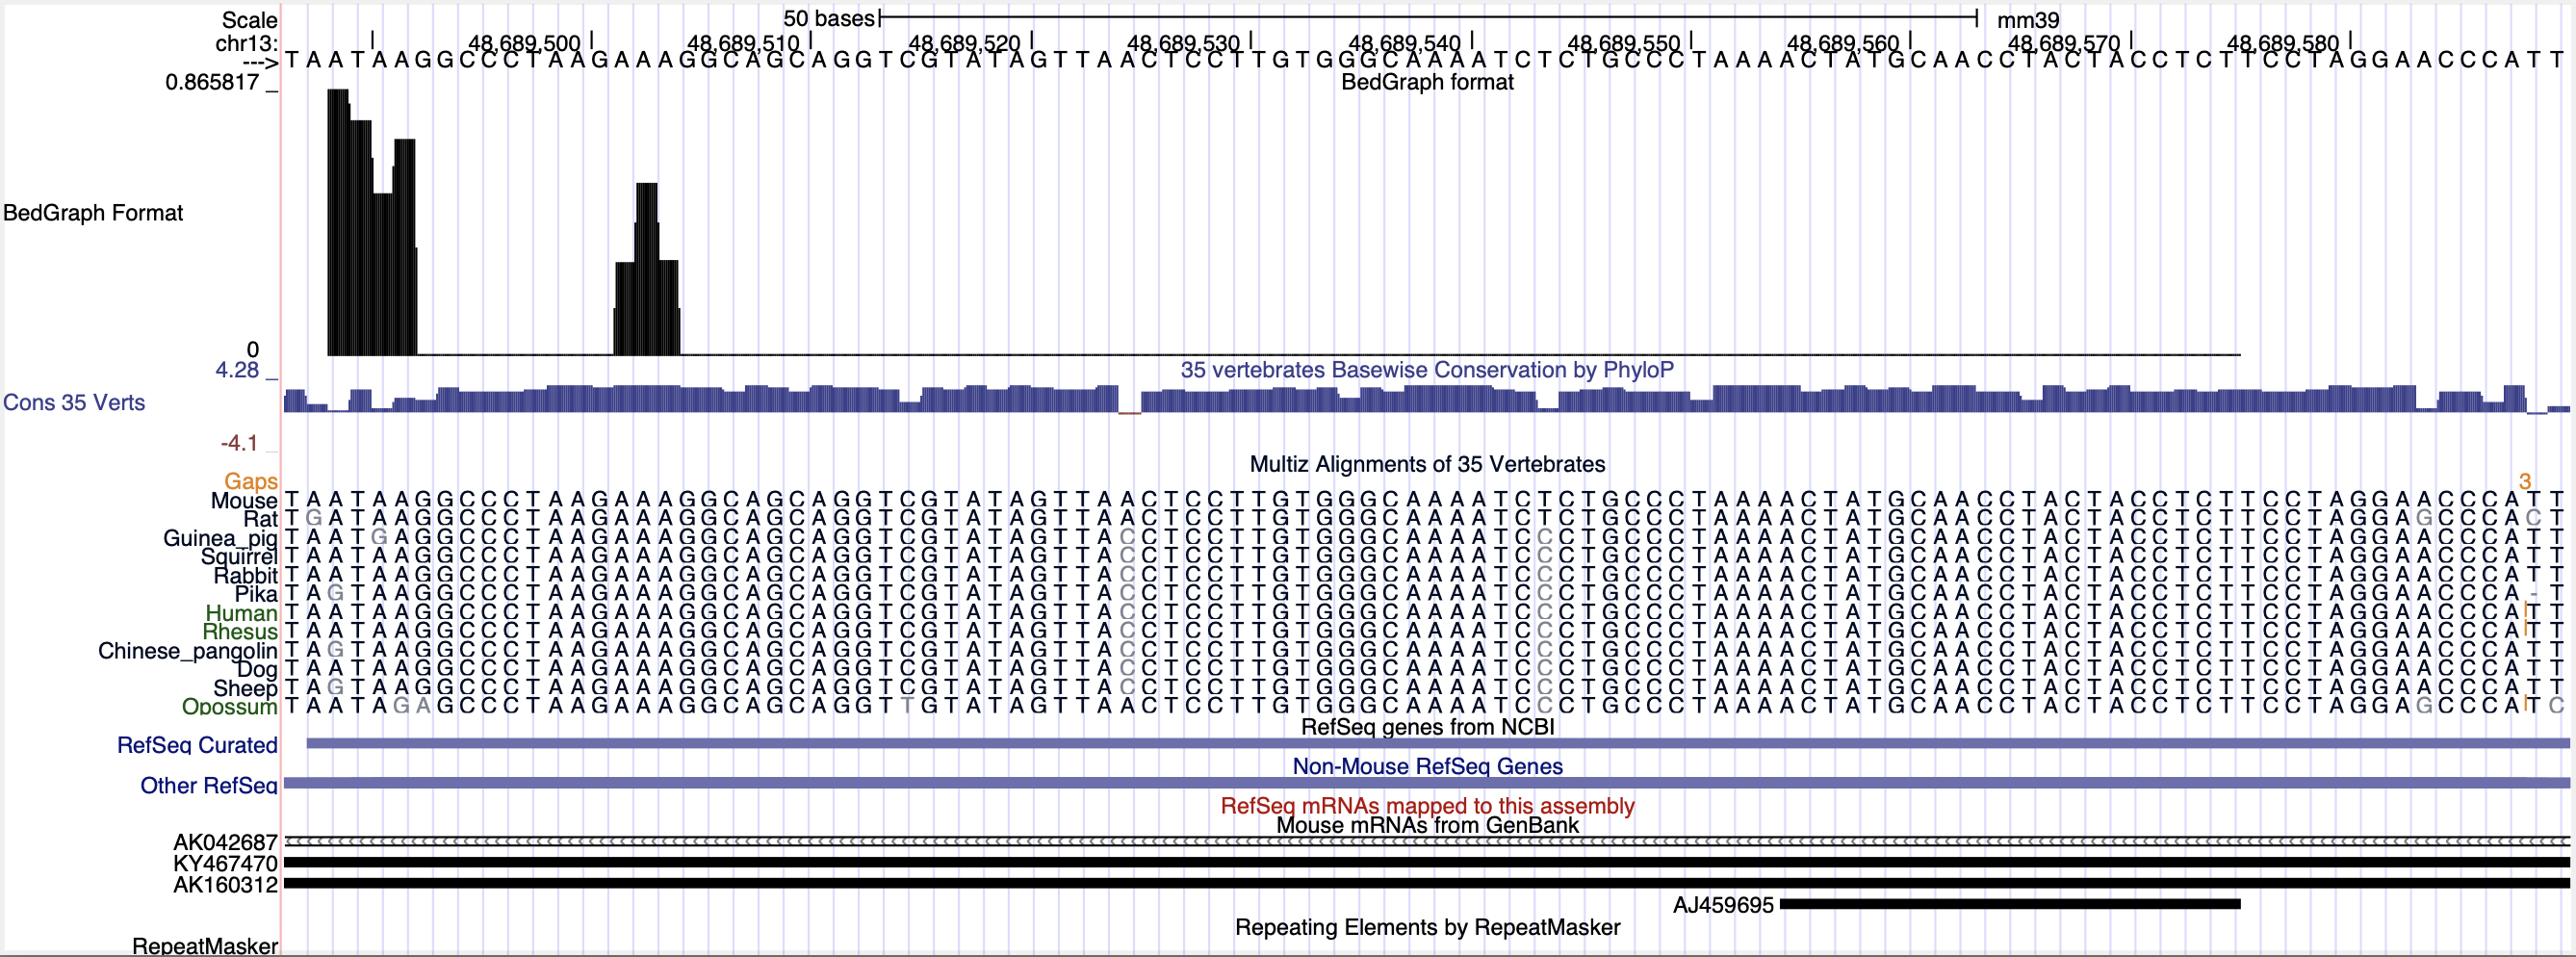

In [115]:
Image("res_img/mirlet7d_ucsc.png")

# gene2: mirlet7f-1

## 1. reference에서 유전자 위치 확인

In [114]:
!grep -i mirlet7f-1 ../datapack/gencode.gtf

chr13	ENSEMBL	gene	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; level 3; mgi_id "MGI:2676798";
chr13	ENSEMBL	transcript	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
chr13	ENSEMBL	exon	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; exon_number 1; exon_id "ENSMUSE00001348852.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";


mirlet7f-1의 위치는 chr13:48691305-48691393

## 2. pileup 생성하기

In [116]:
!samtools view -b -o CLIP-let7f1.bam ../datapack/CLIP-35L33G.bam chr13:48691305-48691393
!samtools mpileup CLIP-let7f1.bam > CLIP-let7f1.pileup
!awk '$2 >= 48691305 && $2 <= 48691393 {print $0; }' CLIP-let7f1.pileup > CLIP-let7f1-gene.pileup
print(48691393-48691305+1)
!wc -l CLIP-let7f1-gene.pileup

[mpileup] 1 samples in 1 input files
89
      82 CLIP-let7f1-gene.pileup


이건 89개중 82개만 나왔다..

## 3. shannon entropy계산 및 BedGraph output생성 (w/ Pandas)

In [117]:
# move to pandas
pileup_7f1 = pd.read_csv("CLIP-let7f1-gene.pileup",
                        sep ='\t', names = ["chrom", "pos", "_ref", "count", "basereads", "quals"])

# extract matched or mismatched seq only
toremove = re.compile('[<>*#^$]')
pileup_7f1["matches"] = pileup_7f1["basereads"].apply(lambda x: toremove.sub("", x))

# add a column for shannon entropy 
pileup_7f1["posplus"] = pileup_7f1["pos"]+1
pileup_7f1["shannon"] = pileup_7f1["matches"].apply(lambda x: shannon_cal(x))

# export BedGraph
bedgraph_7f1 = pileup_7f1[["chrom", "pos", "posplus", "shannon"]]
bedgraph_7f1.to_csv("bedgraph_7f1.txt", index=False, header=None, sep="\t")
with open('bedgraph_7f1.txt', 'r') as original: 
    data = original.read()
with open('bedgraph_7f1.txt', 'w') as modified: 
    modified.write('track type=bedGraph name="BedGraph Format" description="BedGraph format"\n' + data)

## 4. UCSC Genome Browser 결과 확인

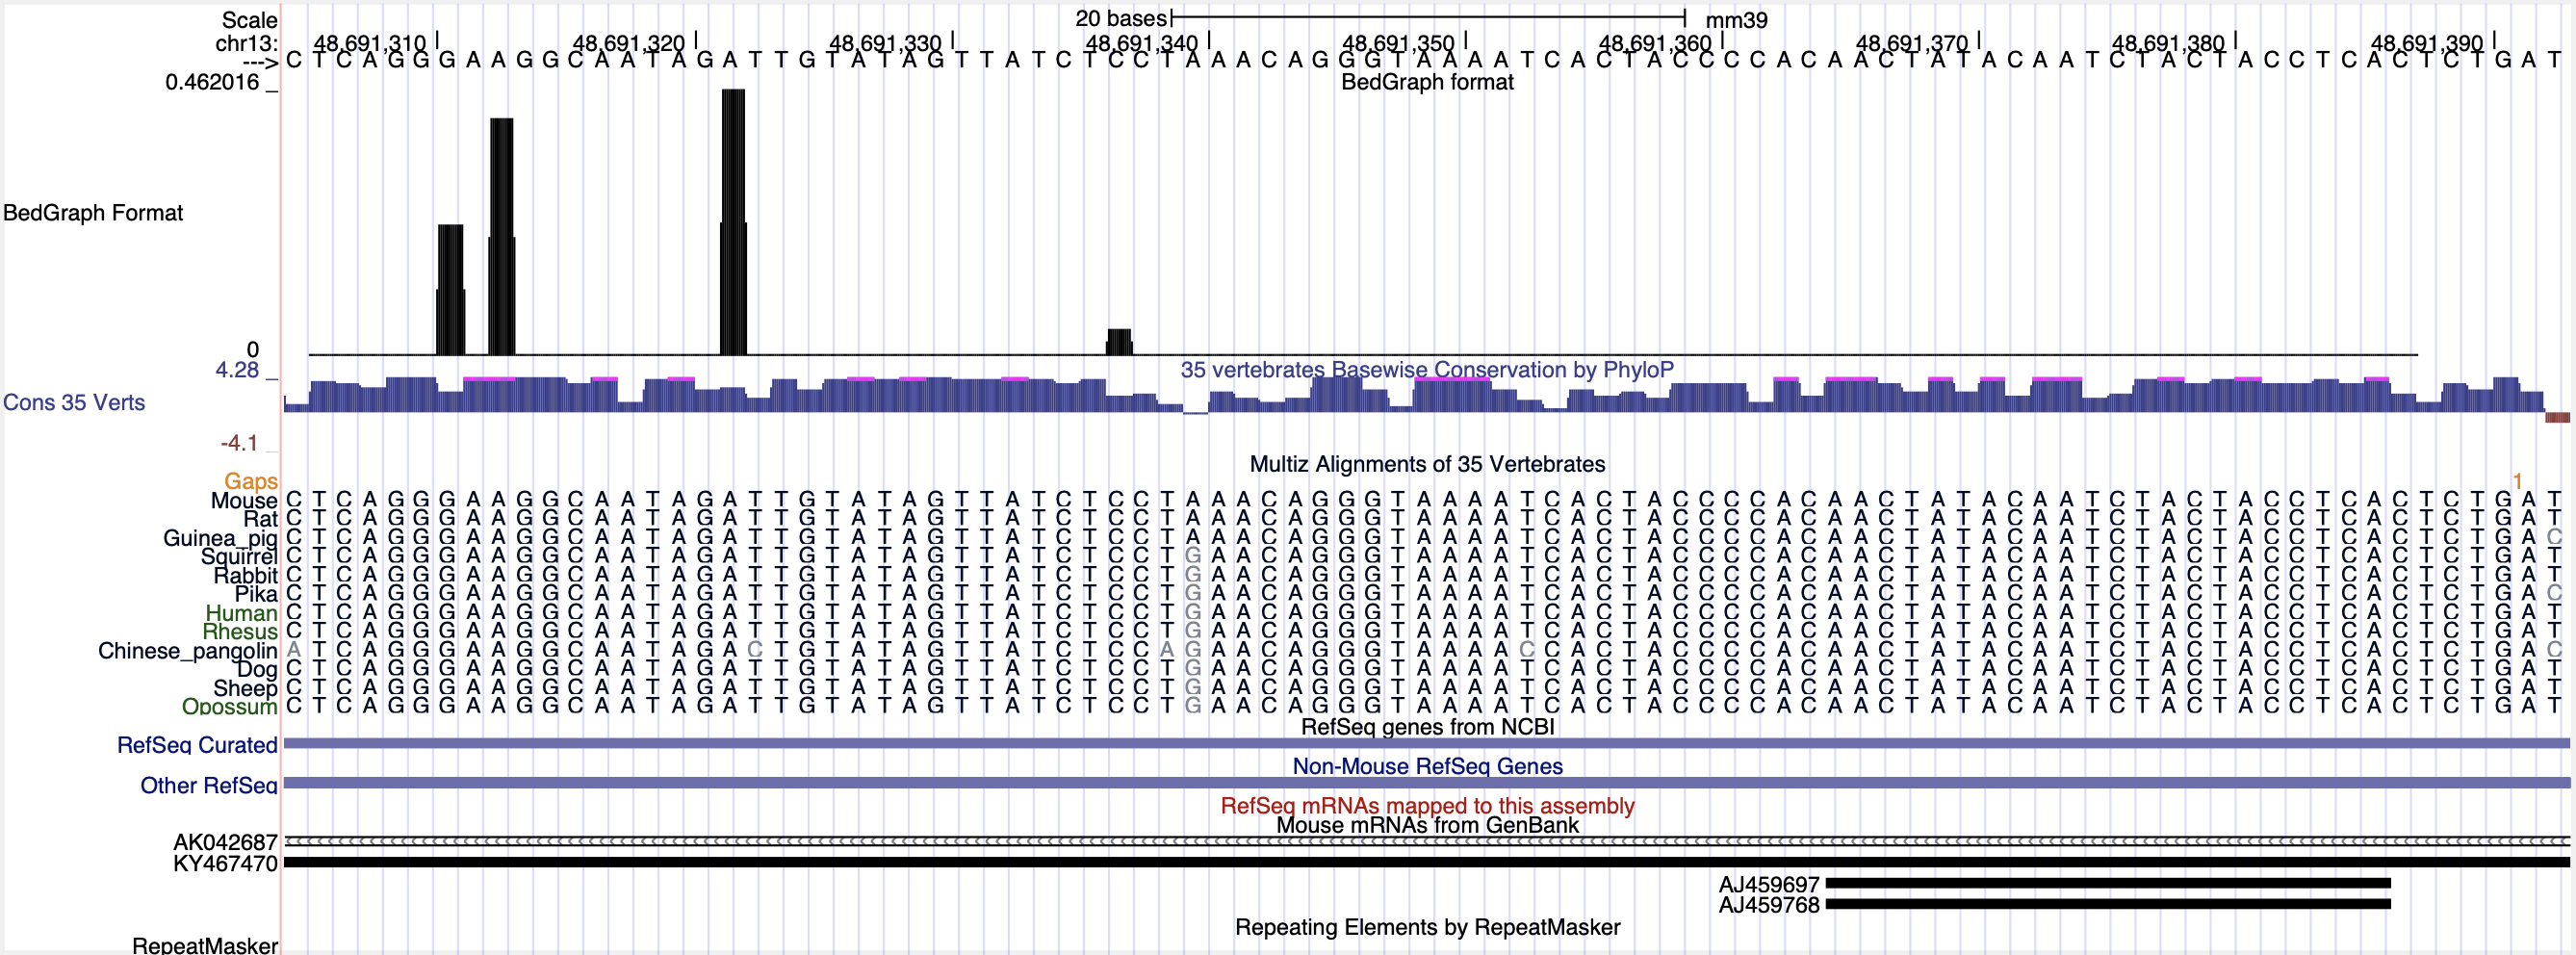

In [118]:
Image("res_img/mirlet7f1_ucsc.png")